# Machine Learning
Machine Learning is just a catchy way of saying "Methods that can update their internal parameters based on obervations". And that is just a fancy way of saying "Fit a model to the data"

# Scikit-learn
- Model building library
- Simple and efficient tools for data mining and data analysis
- Built on NumPy, SciPy, and matplotlib

# Use two different models to classify Iris flowers
- KNeighborsClassifier
- SVC: Support Vector Classification


In [198]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import utils
import matplotlib.pyplot as plt
from sklearn import datasets

## Load example data

Scikit-learn has a bunch of classic datasets and Iris dataset is one of them. It measures 3 types of flowers: Iris Setosa, Iris Viginica and Iris Versicolor. 

In [199]:
iris = datasets.load_iris()

In [200]:
# show 3 types of flowers
utils.show_flowers()

Iris virginica


Iris setosa


Iris versicolor


In [201]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [202]:
# what does the data look like?
print(iris.data[0])
#print(iris.target[0])

[ 5.1  3.5  1.4  0.2]


In [203]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [204]:
X = iris.data
y = iris.target

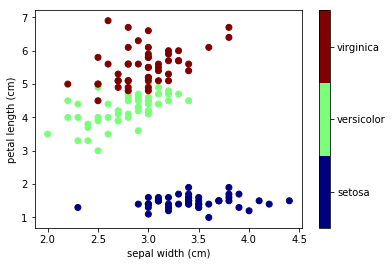

In [205]:
# plot differetn dimensions (0,1, iris)
utils.plot_2d(1,2, iris)

## Make a simple model

Now, we are getting to the Machine Learning part. 
Lets build a model that predicts the species from the neighboring points

In [206]:
from sklearn.neighbors import KNeighborsClassifier
# shift+tab to see the parameters of KNeighborsClassifier

In [207]:
model = KNeighborsClassifier(n_neighbors=5) 
# change n_neighbors to diferent values and compare

In [208]:
# We can get the help function by appending '?' to an object
# KNeighborsClassifier?

In [209]:
model.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [210]:
example_point = [[5, 6, 7, 2],] 
# change the input data to different values
model.predict(example_point)

array([2])

In [211]:
model.predict_proba(example_point)
# [0, 0, 1] means the third type

array([[ 0.,  0.,  1.]])

### Visualizing the model

In [212]:
idx1 = 0
idx2 = 1
#print (X)
# get the first 2 numbers
X_cut = X[:,[idx1, idx2]]
#print (X_cut)

In [213]:
model.fit(X_cut, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

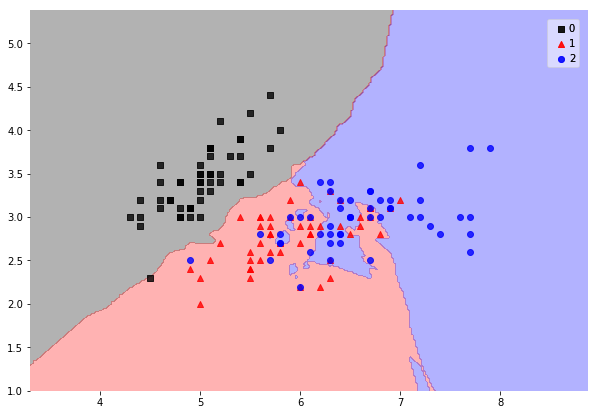

In [214]:
fig = plt.figure(figsize=(10,7))
utils.plot_decision_regions(X_cut, y, clf=model)

### PCA
PCA notes: http://setosa.io/ev/principal-component-analysis/

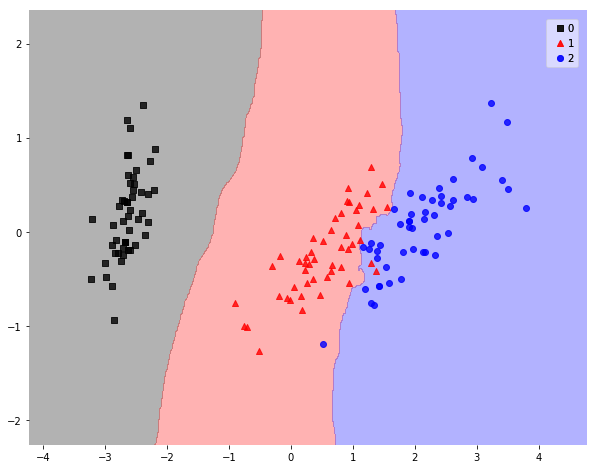

In [215]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_t = pca.fit_transform(X)
model.fit(x_t, y)
fig = plt.figure(figsize=(10,8))

utils.plot_decision_regions(x_t, y, model)

### Evaulate the model
Let's look at the accuracy of our predictions

In [216]:
utils.evaulate_model(model)

This model got 0.987 +- 0.00924 accuracy


##  Try another model SVC

In [217]:
from sklearn.svm import SVC
from sklearn import metrics

In [218]:
model = SVC()

In [219]:
model.fit(X, y)
print (model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [220]:
expected = y

In [221]:
predicted = model.predict(X)

In [223]:
print (metrics.classification_report(expected, predicted))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.96      0.98        50
          2       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150

